# Trabajo Evaluación Continua Regresión

Carga de los datos

In [64]:
xtra <- read.csv("Data/california.dat", comment.char="@", header = FALSE)
#head(xtra)
#Asignación manual
names(xtra) <- c("Longitude", "Latitude", "HousingMedianAge",
"TotalRooms", "TotalBedrooms", "Population", "Households",
"MedianIncome", "MedianHouseValue")
#Asignación automática, facilita el acceso a los campos
#n <- length(names(xtra)) - 1
#names(xtra)[1:n] <- paste ("X", 1:n, sep="")
#names(xtra)[n+1] <- "Y"

In [65]:
xtra    

Longitude,Latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
-117.03,32.78,17,5481,1618,2957,1537,2.5707,171300
-118.23,33.80,26,239,135,165,112,1.3333,187500
-122.46,37.71,39,2076,482,1738,445,3.1958,232100
-122.06,37.94,19,4005,972,1896,893,2.5268,235700
-122.87,38.68,32,4073,718,2053,629,3.7352,228000
-122.47,37.66,18,4172,806,3226,790,5.7535,297900
-122.50,37.77,52,2299,441,1252,415,5.0562,336700
-118.48,34.23,30,1762,263,761,292,6.5268,273100
-117.92,33.83,6,3136,990,1894,859,2.5564,171300


Usamos los paquetes necesarios

In [66]:
require(ISLR)
require(MASS)

Visualizamos la relación entre una variable y la variable objetivo

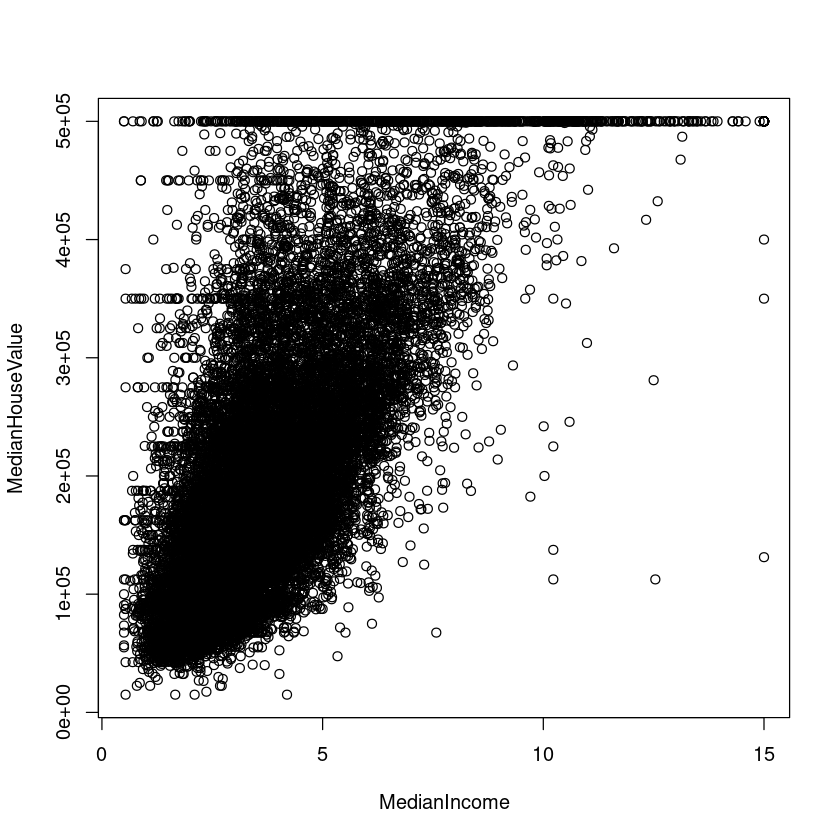

In [28]:
plot(MedianHouseValue~MedianIncome,xtra)

Haciendolo para todas observamos que no parece que haya una relacion lineal evidente

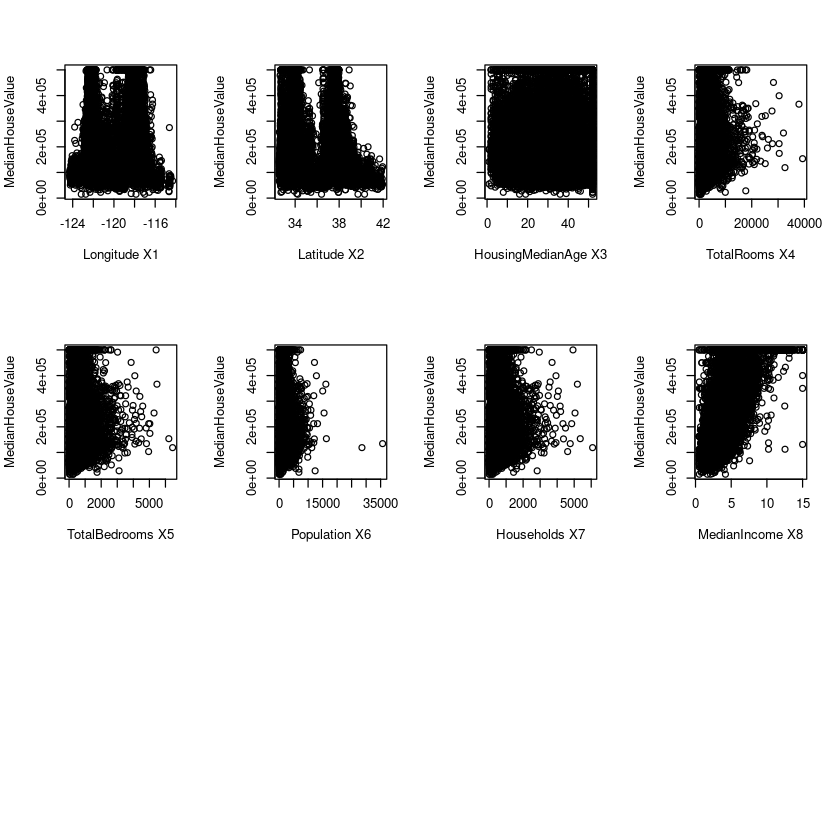

In [26]:
temp <- xtra
plotY <- function(x, y) {
    plot(temp[, y] ~ temp[, x],
        xlab = paste(names(temp)[x], " X", x, sep = ""),
        ylab = names(temp)[y]
    )
}
par(mfrow = c(3, 4)) # Si margin too large => (2,3)
x <- sapply(1:(dim(temp)[2] - 1), plotY, dim(temp)[2])
par(mfrow = c(1, 1))

La unica que parece tener una relación de linealidad moderadamente visible es el MedianIncome por tanto probamos un modelo solo con esa

In [29]:
fit1=lm(MedianHouseValue~MedianIncome,data=xtra)

In [31]:
summary(fit1)


Call:
lm(formula = MedianHouseValue ~ MedianIncome, data = xtra)

Residuals:
    Min      1Q  Median      3Q     Max 
-540697  -55950  -16979   36978  434023 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   45085.6     1322.9   34.08   <2e-16 ***
MedianIncome  41793.8      306.8  136.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 83740 on 20638 degrees of freedom
Multiple R-squared:  0.4734,	Adjusted R-squared:  0.4734 
F-statistic: 1.856e+04 on 1 and 20638 DF,  p-value: < 2.2e-16


Vamos a utilizar una metodologia substractiva, partimos de un modelo con todas las variables y vamos a tratar de quitar las variables que menos nos aportan

In [36]:
fit2=lm(MedianHouseValue~.,data=xtra)
summary(fit2)


Call:
lm(formula = MedianHouseValue ~ ., data = xtra)

Residuals:
    Min      1Q  Median      3Q     Max 
-563013  -43592  -11327   30307  803996 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.594e+06  6.254e+04 -57.468  < 2e-16 ***
Longitude        -4.282e+04  7.130e+02 -60.061  < 2e-16 ***
Latitude         -4.258e+04  6.733e+02 -63.240  < 2e-16 ***
HousingMedianAge  1.156e+03  4.317e+01  26.787  < 2e-16 ***
TotalRooms       -8.182e+00  7.881e-01 -10.381  < 2e-16 ***
TotalBedrooms     1.134e+02  6.902e+00  16.432  < 2e-16 ***
Population       -3.854e+01  1.079e+00 -35.716  < 2e-16 ***
Households        4.831e+01  7.515e+00   6.429 1.32e-10 ***
MedianIncome      4.025e+04  3.351e+02 120.123  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69530 on 20631 degrees of freedom
Multiple R-squared:  0.6371,	Adjusted R-squared:  0.637 
F-statistic:  4528 on 8 and 20631 DF,  p-value: < 2.

Observamos que a priori no hay ninguna variable que no nos aporte, pero podemos probar a quitar la variable Households a ver como afecta al modelo

In [35]:
fit3=lm(MedianHouseValue~.-Households,data=xtra)
summary(fit3)


Call:
lm(formula = MedianHouseValue ~ . - Households, data = xtra)

Residuals:
    Min      1Q  Median      3Q     Max 
-566279  -43499  -11344   30482  744792 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3.673e+06  6.139e+04  -59.83   <2e-16 ***
Longitude        -4.368e+04  7.010e+02  -62.31   <2e-16 ***
Latitude         -4.326e+04  6.654e+02  -65.02   <2e-16 ***
HousingMedianAge  1.165e+03  4.319e+01   26.99   <2e-16 ***
TotalRooms       -8.439e+00  7.879e-01  -10.71   <2e-16 ***
TotalBedrooms     1.497e+02  3.967e+00   37.74   <2e-16 ***
Population       -3.514e+01  9.416e-01  -37.32   <2e-16 ***
MedianIncome      4.042e+04  3.343e+02  120.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69600 on 20632 degrees of freedom
Multiple R-squared:  0.6364,	Adjusted R-squared:  0.6363 
F-statistic:  5158 on 7 and 20632 DF,  p-value: < 2.2e-16


Al hacerlo vemos que el R cuadrado apenas se nos ha resentido, así que vamos a quedarnos con este modelo y tratar de mejorarlo introduciendo interacciones y no linealidad. Una que me parece que tiene sentido es
la interacción entre la población y los ingresos medios.

In [48]:
fit4=lm(MedianHouseValue~.-Households+I(Population*MedianIncome),data=xtra)
summary(fit4)


Call:
lm(formula = MedianHouseValue ~ . - Households + I(Population * 
    MedianIncome), data = xtra)

Residuals:
    Min      1Q  Median      3Q     Max 
-543370  -43558  -11236   30309  841415 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -3.573e+06  6.208e+04 -57.564   <2e-16 ***
Longitude                    -4.258e+04  7.084e+02 -60.109   <2e-16 ***
Latitude                     -4.209e+04  6.745e+02 -62.410   <2e-16 ***
HousingMedianAge              1.170e+03  4.309e+01  27.159   <2e-16 ***
TotalRooms                   -1.517e+01  1.043e+00 -14.544   <2e-16 ***
TotalBedrooms                 1.742e+02  4.675e+00  37.253   <2e-16 ***
Population                   -4.441e+01  1.332e+00 -33.340   <2e-16 ***
MedianIncome                  3.820e+04  4.033e+02  94.716   <2e-16 ***
I(Population * MedianIncome)  3.076e+00  3.133e-01   9.818   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Observamos que mejoramos el R cuadrado ajustado por encima del modelo original. Por tanto el termino nos sirve. Vamos a probar tambien a introducir no linealidad 

In [49]:
fit5=lm(MedianHouseValue~.-Households+I(MedianIncome^2),data=xtra)
summary(fit5)


Call:
lm(formula = MedianHouseValue ~ . - Households + I(MedianIncome^2), 
    data = xtra)

Residuals:
    Min      1Q  Median      3Q     Max 
-500110  -44185  -11117   31051  733162 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.561e+06  6.173e+04  -57.69   <2e-16 ***
Longitude         -4.204e+04  7.094e+02  -59.27   <2e-16 ***
Latitude          -4.161e+04  6.747e+02  -61.67   <2e-16 ***
HousingMedianAge   1.229e+03  4.329e+01   28.40   <2e-16 ***
TotalRooms        -1.076e+01  8.046e-01  -13.38   <2e-16 ***
TotalBedrooms      1.582e+02  4.004e+00   39.52   <2e-16 ***
Population        -3.421e+01  9.404e-01  -36.38   <2e-16 ***
MedianIncome       5.079e+04  8.609e+02   59.00   <2e-16 ***
I(MedianIncome^2) -8.838e+02  6.764e+01  -13.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69310 on 20631 degrees of freedom
Multiple R-squared:  0.6394,	Adjusted R-squared:  0.6392 
F-s

Observamos que el modelo tambien mejora. Por tanto tiene sentido que probemos una combinación de no linealidad e interacción entre terminos

In [50]:
fit6=lm(MedianHouseValue~.-Households+I(MedianIncome^2)+I(MedianIncome*Population),data=xtra)
summary(fit6)


Call:
lm(formula = MedianHouseValue ~ . - Households + I(MedianIncome^2) + 
    I(MedianIncome * Population), data = xtra)

Residuals:
    Min      1Q  Median      3Q     Max 
-475931  -44194  -10762   31214  831666 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -3.458e+06  6.242e+04  -55.40   <2e-16 ***
Longitude                    -4.090e+04  7.167e+02  -57.06   <2e-16 ***
Latitude                     -4.039e+04  6.838e+02  -59.08   <2e-16 ***
HousingMedianAge              1.235e+03  4.318e+01   28.59   <2e-16 ***
TotalRooms                   -1.767e+01  1.056e+00  -16.73   <2e-16 ***
TotalBedrooms                 1.833e+02  4.706e+00   38.94   <2e-16 ***
Population                   -4.367e+01  1.328e+00  -32.89   <2e-16 ***
MedianIncome                  4.865e+04  8.849e+02   54.97   <2e-16 ***
I(MedianIncome^2)            -8.944e+02  6.749e+01  -13.25   <2e-16 ***
I(MedianIncome * Population)  3.141e+00  3.121e

Obtenemos el mejor modelo que hemos conseguido hasta ahora. Finalmente como ultima prueba vamos a añadir otro termino que incluya no linealidad e interacción

In [61]:
fit6=lm(MedianHouseValue~.-Households+I(MedianIncome^2)+I(MedianIncome*Population)+I((MedianIncome^2)*Population^(1/2)),data=xtra)
summary(fit6)


Call:
lm(formula = MedianHouseValue ~ . - Households + I(MedianIncome^2) + 
    I(MedianIncome * Population) + I((MedianIncome^2) * Population^(1/2)), 
    data = xtra)

Residuals:
    Min      1Q  Median      3Q     Max 
-389155  -44209  -10916   30770  838166 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -3.467e+06  6.233e+04 -55.619  < 2e-16
Longitude                              -4.090e+04  7.156e+02 -57.160  < 2e-16
Latitude                               -4.033e+04  6.827e+02 -59.079  < 2e-16
HousingMedianAge                        1.245e+03  4.313e+01  28.871  < 2e-16
TotalRooms                             -1.671e+01  1.061e+00 -15.756  < 2e-16
TotalBedrooms                           1.800e+02  4.715e+00  38.169  < 2e-16
Population                             -3.729e+01  1.537e+00 -24.266  < 2e-16
MedianIncome                            5.080e+04  9.217e+02  55.116  < 2e-16
I(MedianIncome^2)  

Seguimos mejorando el modelo, pero ahora uno de los terminos que hemos introducido nos deja de aportar infomación. Vamos a eliminarlo por simplicidad

In [63]:
fit7=lm(MedianHouseValue~.-Households+I(MedianIncome^2)+I((MedianIncome^2)*Population^(1/2)),data=xtra)
summary(fit7)


Call:
lm(formula = MedianHouseValue ~ . - Households + I(MedianIncome^2) + 
    I((MedianIncome^2) * Population^(1/2)), data = xtra)

Residuals:
    Min      1Q  Median      3Q     Max 
-386254  -44187  -10936   30799  835515 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -3.470e+06  6.188e+04  -56.09   <2e-16
Longitude                              -4.094e+04  7.116e+02  -57.53   <2e-16
Latitude                               -4.037e+04  6.787e+02  -59.48   <2e-16
HousingMedianAge                        1.246e+03  4.313e+01   28.88   <2e-16
TotalRooms                             -1.647e+01  9.137e-01  -18.02   <2e-16
TotalBedrooms                           1.791e+02  4.300e+00   41.66   <2e-16
Population                             -3.674e+01  9.566e-01  -38.41   <2e-16
MedianIncome                            5.095e+04  8.575e+02   59.42   <2e-16
I(MedianIncome^2)                      -1.604e+03  8.72

Finalmente nos quedamos con este modelo. Como experimento calculamos la raiz del error cuadratico medio sobre el conjunto inicial. Idealmente haremos esto más adelante sobre un conjunto de test

In [87]:
yprime <- predict(fit7,xtra)
sqrt(sum(abs(xtra$MedianHouseValue-yprime)^2)/length(yprime))

[1] 69015.25

Pasamos a la segunda parte del laboratorio Para ello tenemos que utilizar el paquete kknn

In [68]:
require(kknn)

Loading required package: kknn



Vamos a utilizar knn para regresión. Los parametros por defecto son k=7, distancia=2 ,kernel = optimal y scale= TRUE, en este caso le estamos pasando el mismo conjunto de train para test. Esto esta mal, pero más adelante utilizaremos cross validation

In [69]:
fitknn1 <- kknn(MedianHouseValue ~ ., xtra, xtra)

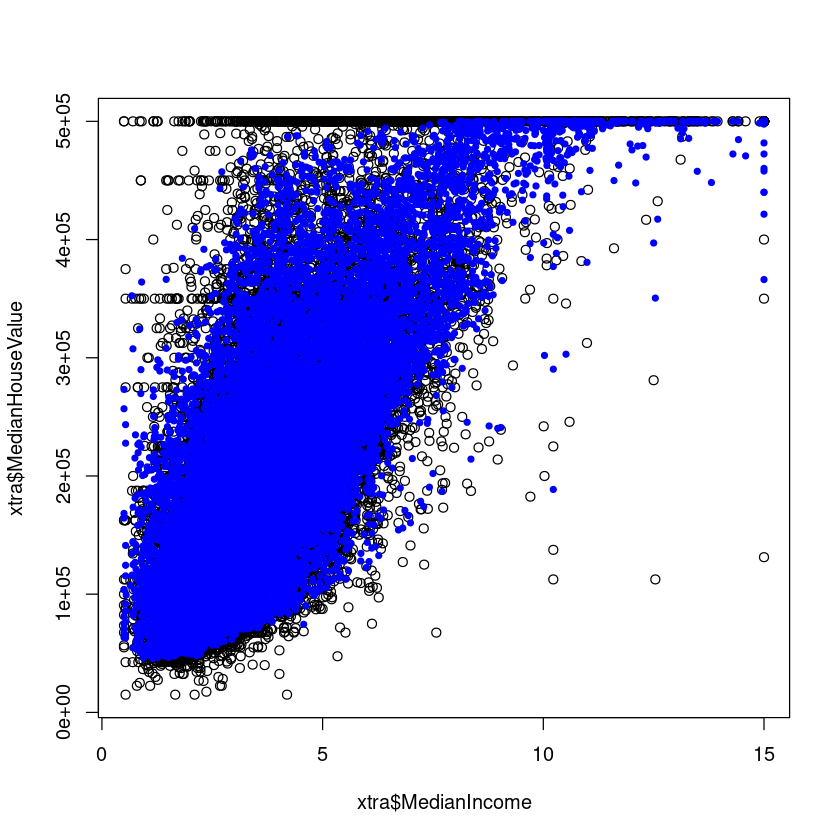

In [73]:
plot(xtra$MedianHouseValue~xtra$MedianIncome)
points(xtra$MedianIncome,fitknn1$fitted.values,col="blue",pch=20)

Calculamos el error

In [85]:
yprime <- fitknn1$fitted.values
sqrt(sum((xtra$MedianHouseVale-yprime)^2)/length(yprime)) #RMSE

[1] 0

In [88]:
fitknn2 <- kknn(MedianHouseValue ~ .-Households, xtra, xtra)

In [106]:
yprime <- fitknn2$fitted.values
sqrt(sum((xtra$MedianHouseVale-yprime)^2)/length(yprime)) #RMSE

[1] 0

Observamos que el error es 0 Esto se debe seguramente a un error de R, puesto que podemos observar si vemos que el resultado de calcular MedianHouseValue - lo predicho es 0, sin embargo si comprobamos elemento a elemento vemos que los vectores son diferentes. por decimales. No he sabido resolver esto.

In [108]:
sum(xtra$MedianHouseVale-yprime)

[1] 0

In [104]:
xtra$MedianHouseValue

[1] 171300 187500 232100 235700 228000 297900 336700 273100 171300 285200
   [11] 342500 150800  86200  59800 139300 223500  81300 353500  93800 244500
   [21] 145900 450800 125900  84400 156800 184300 167000 228100 133400 163200
   [31] 342200 134200 500001 500001 136500 102100  70100 372800  59000 235500
   [41] 100300 131000 392900 132700 111900 271500 202000 310000 102700 152400
   [51] 209100 227700  72200 177600 198700 141700 462200 350900 162300 237200
   [61] 412500 156900  56700  73200 128300 129200 215700 275000 103700 152300
   [71] 204500 387500 350000 180700 235100  97900 165300 353600 171300 123100
   [81]  56500  48800 195800 246400 256300 228100 159400 370400 283000 176900
   [91] 113700 314100 171400 156700 134800 213700 394900 112500  91900 108800
  [101] 193800 160100 350000 222500  89400  37500 310000 101200 188500 156300
  [111]  85500 226500 222400 414600 340900 165600 153300 153800 224700 211300
  [121] 253800  59200 174100 351900 262500 500001 303700  86600 208800  99400
  [131]  93600  67500 239100 302600 274700 166900 141600 182000 250000 124900
  [141] 226500  90400  76900 123400 222900 166300 302000 141400 157200 271600
  [151] 500001 176600 215900 173900  81600 500001 154500 201600 103600  87500
  [161] 232100 161400  45500 284200 500001 134100  49800 133700 243700 420000
  [171] 275000 150000 187800 221900 151300  82800 155700 261500 346200  60600
  [181]  61600 134200 304500 314900 500001  57600 203200  84800 162500 244100
  [191] 242000 500001  70800 150000 127300 217100  51000 350200 110200 104900
  [201] 495600 141100 190300 300000 500001 331900 338800 116700 264100  82800
  [211] 394400 111200 318200 132600 276700 302400 193800 241000 367700 120400
  [221]  45000 109300 207300 394400 307200 112800 279200 253900 136400  84300
  [231] 156900 173800 472800 500001 156200  62000 106400 133900 210100 112500
  [241]  62700  58000 229200 500001 163100 274000 244800 500001 195000  79500
  [251] 239900 220000 255600 137500 164900 233200 155100 500001 288500 131900
  [261] 110700 231700 162000  86100  51700  97100 164100  73500 416500 283300
  [271] 226700 178500 190000 313800 287500 278200 117400 320900  47500 500001
  [281] 141500 500001 197100 216100 172200  57800 174200 322400 213200 267600
  [291] 174000  94800 500001 189600  96700 236500 172500 162500 205000 181800
  [301] 176000 258900 245100 264700  71400  78700 235600  98100 107900 111500
  [311] 292100 331300 114000 258100 350000 179500 217100 500001 142000 195900
  [321]  84200  72700 170700 212500 200000 170500 258300  79200 289700 149100
  [331]  62000  80900 158900 125200 173700  79200 112900 137500 500001 192700
  [341] 218100  48100  44000 358000 140000 171100 319000 360600 111300 198700
  [351] 183800 119600 175000 231200 342900 195800 205100 294000  65000  62300
  [361]  88100  92800 109700  64000 500001 140300 195500 217000  90100  55300
  [371] 146300 123500 403000 316000 156700  88800 229900 127200 204500 455400
  [381] 112500 393900 345700 110700 212200 213200  94600 500000 279200 178600
  [391] 129700 189600 457300 118800 115400 500001 173200 115700 156300 201200
  [401] 125900 358800 272900 155700 267100 355600 100000  92600 188200  81100
  [411] 190800 417000 279200  72100 208400  87100 284100  83800 144000 400000
  [421] 288200 154200 181300 139200  76200 176700  70300 154700 114300 500001
  [431] 183800 161800 111500 215000 187500 227900 128800 358500 373700 500001
  [441] 135300  57200 158000 201500 123400 269800 195800 236900 225900 114300
  [451] 500001 435700 296100 381900 224200  30000  57800  55000 307400 162500
  [461]  68200  69100  90000 191800 360900 161900 153100  60900 390900 229100
  [471] 181900 262000  98800  55500  70700 216900  95500 324900  69400  74000
  [481] 119600 191900  90800 500001 406200 325000 320700 412300 350700 123800
  [491] 135200 334400  56500 450000 344800 159400 220700 181400 212300 334600
  [501] 102000 500001 248900  98900 173600 248800 215600 139200 159600  81900
  [511] 122500 381800 5000

In [105]:
yprime

[1] 160427.26 186064.49 227077.90 216716.38 208918.01 255144.97 321425.18
    [8] 370008.51 183635.20 300098.17 318487.01 181483.88  93541.16  68305.27
   [15] 143649.04 255242.91  82722.98 316415.42 153737.34 221869.43 157224.25
   [22] 335342.40 143269.73  79744.13 138490.99 171103.32 173550.99 204925.66
   [29] 162884.96 202359.32 328535.65 147133.87 484743.74 463467.01 237432.89
   [36] 145528.15  77963.22 415909.57  57341.42 230968.34  96127.27 149539.76
   [43] 342011.14 114828.16 134627.32 321779.89 186973.37 233215.21 106157.28
   [50] 150584.47 215611.01 189925.42  79669.98 194976.19 213516.40 223313.79
   [57] 435262.76 283570.89 170413.00 252143.94 282918.04 132084.56  89087.51
   [64] 122269.93 116719.00 123229.10 209404.97 360336.48 156037.52 145481.41
   [71] 205735.51 442972.95 269311.23 164524.95 191911.02 131621.02 200255.85
   [78] 334088.93 195053.80 100723.15  53244.55  58666.17 177610.22 343874.10
   [85] 260979.73 213790.17 188165.59 344169.32 260529.29 177350.42  92344.71
   [92] 206300.26 145894.84 117013.29 135640.53 229328.12 415667.73 122332.98
   [99] 106380.72 127312.69 208365.69 160771.54 236916.81 242233.64  98651.98
  [106] 109735.05 178836.01 101995.92 196373.75 163639.70  79250.87 183705.15
  [113] 185677.85 343982.78 310849.38 135148.89 184515.90 156087.25 239913.15
  [120] 194656.74 242820.35  61420.64 191087.42 412662.85 211825.69 396858.80
  [127] 222341.28 102513.34 170851.09 128748.32 136032.86 124834.29 241223.82
  [134] 219504.04 289715.64 178337.22 139413.95 172262.92 215486.99 135697.40
  [141] 228816.38 117789.89  93916.05 121950.51 215619.54 242592.57 320336.38
  [148] 164464.79 138509.97 207879.73 472123.33 170262.34 235301.68 161570.59
  [155]  95479.88 364090.69 161534.65 222565.46 121254.08 118728.79 186090.15
  [162] 172843.49  47992.44 279557.44 499110.49 142789.15  47869.57 184771.01
  [169] 249836.37 395570.93 247800.30 220017.97 218861.35 195429.58 213977.84
  [176]  89150.26 165508.14 283516.02 322189.33  62699.70  55033.47 228946.09
  [183] 285907.87 324437.61 481529.65  58677.18 176942.68  85064.01 146190.85
  [190] 203165.91 251253.23 386123.92  78993.26 142412.78 130147.38 196201.18
  [197]  57581.55 292576.10 121637.60  93226.76 496802.34 158337.50 190739.07
  [204] 247046.53 423934.41 299854.12 276985.59 112097.84 272421.53 102993.01
  [211] 335144.46 143764.03 339452.74 142915.26 242981.16 303074.34 200086.59
  [218] 269412.17 359119.76 172290.39  66118.86 138544.83 232118.64 345435.90
  [225] 272262.60 110770.33 238562.98 199277.06 178309.29 124898.30 173948.51
  [232] 177508.68 456471.80 375230.16 155156.63  71970.60 120516.32 145690.00
  [239] 197306.15 105895.21  74434.51  73362.10 232474.80 500001.00 176847.46
  [246] 277785.38 278664.86 365233.46 162860.26  71968.96 291770.34 212432.39
  [253] 237424.94 103296.93 167084.23 289195.96 180508.40 500001.00 306232.60
  [260] 145380.03 173631.46 291671.03 189182.58  85013.49  54616.58 105433.53
  [267] 171123.65  73353.50 403615.55 207274.03 233792.88 175020.09 159515.62
  [274] 353132.11 306374.88 224502.04 130788.79 359938.10  52180.96 500001.00
  [281] 213140.58 381086.87 195802.98 181771.69 245792.09  79167.04 235291.73
  [288] 231294.34 206838.15 244731.22 173047.77  96620.16 500001.00 186510.03
  [295] 102529.76 186893.71 189877.10 107367.01 185563.18 142712.91 163815.29
  [302] 293073.31 188130.53 275024.52  71620.75  72261.02 260144.84 100346.23
  [309] 116182.83 122933.52 309781.45 266964.83 144197.92 205227.15 257663.70
  [316] 150502.79 225116.52 500001.00 164917.64 166333.13 104804.11  90197.54
  [323] 180563.79 203913.53 200696.15 163067.71 249683.66  97456.54 311277.95
  [330] 152600.07  90487.49  69660.53 151440.33 116387.61 198043.26  71810.37
  [337] 134516.55 226933.21 468072.36 193196.64 226906.25  64432.24  49498.50
  [344] 345671.59 145226.33 185009.88 282533.37 363002.60 108835.90 209029.75
  [351] 214252.55 109495.93 234241.81 247919.66 353731.19 216740.39 215387.63
  [358] 237530.85  90934.4

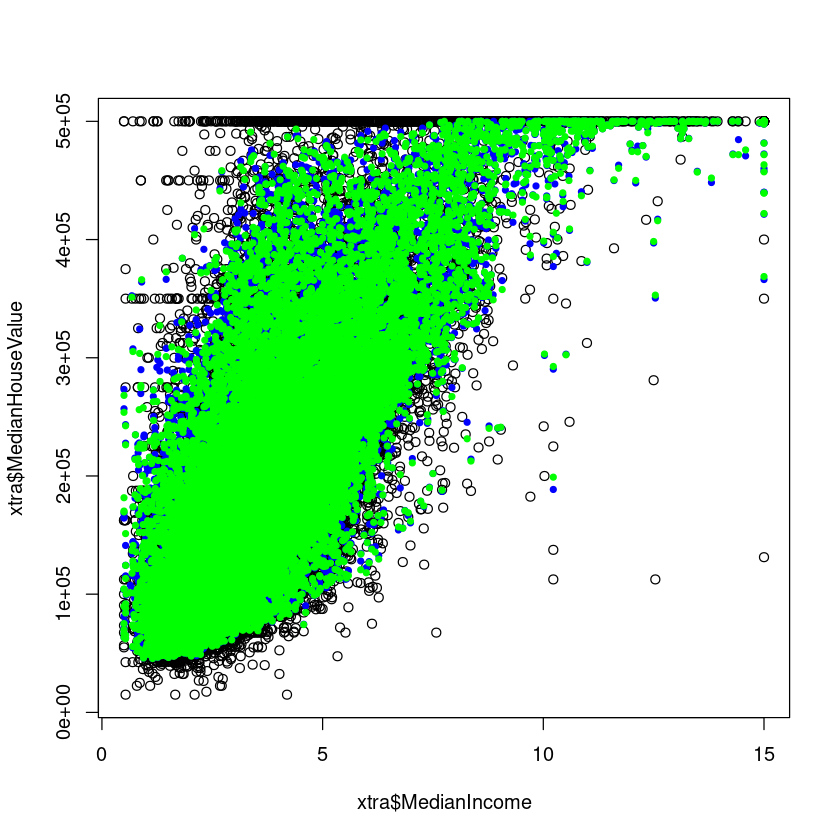

In [95]:
plot(xtra$MedianHouseValue~xtra$MedianIncome)
points(xtra$MedianIncome,fitknn1$fitted.values,col="blue",pch=20)
points(xtra$MedianIncome,fitknn2$fitted.values,col="green",pch=20)

## 5 fold Cross validation para regresión lineal con todas las variables

In [100]:
nombre <- "Data/california"
run_lm_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=lm(Y~.,x_tra)
    yprime=predict(fitMulti,test)
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
lmMSEtrain<-mean(sapply(1:5,run_lm_fold,nombre,"train"))
lmMSEtest<-mean(sapply(1:5,run_lm_fold,nombre,"test"))

In [101]:
lmMSEtrain

[1] 4830423550

In [102]:
lmMSEtest

[1] 4848069879

## 5 fold Cross validation para knn con todas las variables

In [97]:
nombre <- "Data/california"
run_knn_fold <- function(i, x, tt = "test") {
    file <- paste(x, "-5-", i, "tra.dat", sep="")
    x_tra <- read.csv(file, comment.char="@", header=FALSE)
    file <- paste(x, "-5-", i, "tst.dat", sep="")
    x_tst <- read.csv(file, comment.char="@", header=FALSE)
    In <- length(names(x_tra)) - 1
    names(x_tra)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tra)[In+1] <- "Y"
    names(x_tst)[1:In] <- paste ("X", 1:In, sep="")
    names(x_tst)[In+1] <- "Y"
    if (tt == "train") {
        test <- x_tra
    }
    else {
        test <- x_tst
    }
    fitMulti=kknn(Y~.,x_tra,test)
    yprime=fitMulti$fitted.values
    sum(abs(test$Y-yprime)^2)/length(yprime) ##MSE
}
knnMSEtrain<-mean(sapply(1:5,run_knn_fold,nombre,"train"))
knnMSEtest<-mean(sapply(1:5,run_knn_fold,nombre,"test"))

In [98]:
knnMSEtrain

[1] 1562164927

In [99]:
knnMSEtest

[1] 3847242396

Podemos ver como haciendo cross Validation el error es menor usando knn para todas las variables

## Comparativas generales entre algoritmos

In [109]:
#leemos la tabla con los errores medios de test
resultados <- read.csv("Data/regr_test_alumnos.csv")
tablatst <- cbind(resultados[,2:dim(resultados)[2]])
colnames(tablatst) <- names(resultados)[2:dim(resultados)[2]]
rownames(tablatst) <- resultados[,1]


In [110]:
#leemos la tabla con los errores medios de entrenamiento
resultados <- read.csv("Data/regr_train_alumnos.csv")
tablatra <- cbind(resultados[,2:dim(resultados)[2]])
colnames(tablatra) <- names(resultados)[2:dim(resultados)[2]]
rownames(tablatra) <- resultados[,1]

In [111]:
##TABLA NORMALIZADA - lm (other) vs knn (ref) para WILCOXON
# + 0.1 porque wilcox R falla para valores == 0 en la tabla

difs <- (tablatst[,1] - tablatst[,2]) / tablatst[,1]
wilc_1_2 <- cbind(ifelse (difs<0, abs(difs)+0.1, 0+0.1), ifelse (difs>0, 	abs(difs)+0.1, 0+0.1))
colnames(wilc_1_2) <- c(colnames(tablatst)[1], colnames(tablatst)[2])
head(wilc_1_2)

out_test_lm,out_test_kknn
0.1909091,0.1000000
0.1000000,1.0294118
0.1000000,0.4339071
0.1000000,0.3885965
0.1548506,0.1000000
0.1000000,0.3061057


In [112]:
#Aplicaci�n del test de WILCOXON
LMvsKNNtst <- wilcox.test(wilc_1_2[,1], wilc_1_2[,2], alternative = "two.sided", paired=TRUE)
Rmas <- LMvsKNNtst$statistic
pvalue <- LMvsKNNtst$p.value
LMvsKNNtst <- wilcox.test(wilc_1_2[,2], wilc_1_2[,1], alternative = "two.sided", paired=TRUE)
Rmenos <- LMvsKNNtst$statistic
Rmas
Rmenos
pvalue

V 
78

V 
93

[1] 0.7660294

Observamos como segun el test de wilcoxon no existen diferencias significativas entre ellos

In [113]:
#Aplicaci�n del test de Friedman
test_friedman <- friedman.test(as.matrix(tablatst))
test_friedman


	Friedman rank sum test

data:  as.matrix(tablatst)
Friedman chi-squared = 8.4444, df = 2, p-value = 0.01467


Pero segun el test de friedman si existen diferencias significativas entre dos

In [114]:

#Aplicaci�n del test post-hoc de HOLM
tam <- dim(tablatst)
groups <- rep(1:tam[2], each=tam[1])
pairwise.wilcox.test(as.matrix(tablatst), groups, p.adjust = "holm", paired = TRUE)


	Pairwise comparisons using Wilcoxon signed rank exact test 

data:  as.matrix(tablatst) and groups 

  1     2    
2 0.580 -    
3 0.081 0.108

P value adjustment method: holm 

Existen diferencias entre M5 y los algoritmos de KNN y Regresion lineal. Pero estos dos son equivalentes entre si